## BSRGAN with C-arm images

In [1]:
import torch
import cv2
import os
import sys
sys.path.append("/Users/hyeongcheolmoon/Desktop/BSRGAN/")
from utilss import utils_image as util
from models.network_rrdbnet import RRDBNet as net
import main_download_pretrained_models

In [2]:
!python /Users/hyeongcheolmoon/Desktop/BSRGAN/main_download_pretrained_models.py --models "BSRGAN" --model_dir "/Users/hyeongcheolmoon/Desktop/BSRGAN/model_zoo"
!python /Users/hyeongcheolmoon/Desktop/BSRGAN/main_download_pretrained_models.py --models "BSRGAN.pth" --model_dir "/Users/hyeongcheolmoon/Desktop/BSRGAN/model_zoo"

trying to download ['BSRGAN']
already exists, skip downloading [BSRGAN.pth]
already exists, skip downloading [BSRNet.pth]
already exists, skip downloading [BSRGANx2.pth]
trying to download ['BSRGAN.pth']
already exists, skip downloading [BSRGAN.pth]


In [3]:
pwd

'/Users/hyeongcheolmoon/Desktop'

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
img_path = 'c.jpg'
image_pil = Image.open(img_path)
image = np.array (image_pil)
image.shape

(1024, 1024, 3)

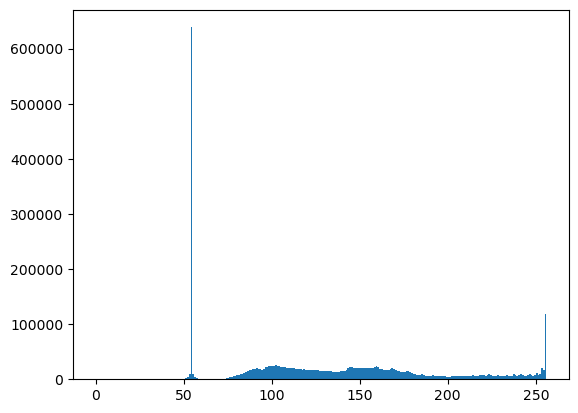

In [6]:
plt.hist(image.ravel(),256,[0,256])
plt.show()

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = net(in_nc=3, out_nc=3, nf=64, nb=23, gc=32, sf=4)
model.load_state_dict(torch.load(os.path.join('/Users/hyeongcheolmoon/Desktop/BSRGAN/model_zoo', 'BSRGAN.pth')), strict=True)
model = model.to(device)
model.eval()

[3, 3, 64, 23, 32, 4]


RRDBNet(
  (conv_first): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (RRDB_trunk): Sequential(
    (0): RRDB(
      (RDB1): ResidualDenseBlock_5C(
        (conv1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(96, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv3): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv4): Conv2d(160, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv5): Conv2d(192, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
      )
      (RDB2): ResidualDenseBlock_5C(
        (conv1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(96, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv3): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv4): Conv2d(160, 32, kernel_size=(3, 3), str

In [8]:
with torch.no_grad():
    img = cv2.imread(img_path)

    img_L = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
    img_L = util.uint2tensor4(img_L)
    
    img_E = model(img_L)

    img_E = util.tensor2uint(img_E)
    util.imsave(img_E, os.path.splitext(img_path)[0] + '_result.jpg')

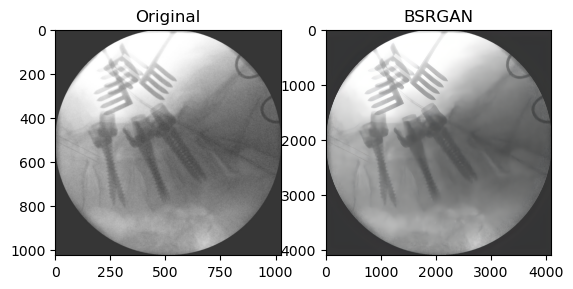

In [9]:
fig = plt.figure()
rows = 1; cols = 2
ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('Original')
ax1.imshow(image)

ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('BSRGAN')
ax2.imshow(img_E)